# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [73]:
import pandas as pd

In [74]:
datos = pd.read_csv('/content/marketing_inversiones.csv')

In [75]:
datos.head()

edad    estado_civil escolaridad default  saldo prestatario  \
0    45      casado (a)    superior      no    242          no   
1    42      casado (a)  secundaria      no   1289          no   
2    23     soltero (a)    superior      no    363          no   
3    58  divorciado (a)    superior      no   1382          no   
4    50      casado (a)  secundaria      no   3357          no   

   ultimo_contacto  ct_contactos adherencia_inversion  
0              587             1                   si  
1              250             4                   si  
2               16            18                   no  
3              700             1                   si  
4              239             4                   si

Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [76]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


##¿Qué es Machine Learning?

El Inteligencia Artificial (IA) se ha destacado como una de las áreas de mayor crecimiento y visibilidad en los últimos años. Es un campo de estudio amplio que abarca diversas áreas del conocimiento, tanto prácticas como teóricas, incluyendo la ciencia de la computación, la ciencia cognitiva, la filosofía de la mente y el Machine Learning (Aprendizaje Automático).

El Machine Learning (ML), como una subárea de la inteligencia artificial, se concentra en el desarrollo de algoritmos que son utilizados en la computadora para realizar tareas sin la necesidad de programar explícitamente las reglas que se utilizarán. Estos algoritmos basan sus decisiones a partir de datos con el objetivo de comprender e identificar el patrón existente en esos datos, para luego utilizar ese conocimiento en la realización de predicciones.

**Cómo funciona el Machine Learning**
El funcionamiento del Machine Learning tiene 3 etapas principales:

***1 - Recolección de datos***

La primera etapa de un proyecto de ML es la extracción o recolección de datos. Los datos son esenciales y pueden considerarse la materia prima de los algoritmos. La cantidad y calidad de estos datos tienen un impacto muy grande en el aprendizaje de los modelos. Con pocos datos, el modelo puede no tener información suficiente para aprender. Con datos de poca calidad, el modelo puede no ser capaz de diferenciar bien el patrón de los datos o comprender el patrón de manera diferente a lo que ocurre con los datos del mundo real.


***2 - Entrenamiento de los modelos***

Después de recolectar datos y asegurar que tienen calidad, se llega a la etapa de entrenar los modelos. El entrenamiento consiste en que el algoritmo busque el patrón presente en los datos y construya una regla para tomar decisiones posteriormente en nuevos datos.

***3 - Evaluación***

Con el modelo entrenado, se llega a la etapa de evaluar el desempeño del modelo, para identificar si realmente aprendió el patrón de los datos y si es capaz de aplicar de forma satisfactoria la regla generada por el algoritmo en datos nuevos, que no fueron utilizados durante el momento del entrenamiento.

A pesar de ser las etapas principales, estas no son las únicas tareas presentes en proyectos de Machine Learning. Cada proyecto tiene sus propias características, ya sea por el formato y naturaleza de los datos, el tipo de aplicación o los desafíos encontrados a lo largo del proceso.

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [77]:
import plotly.express as px

In [78]:
px.histogram(datos, 'adherencia_inversion',text_auto = True)

In [79]:
px.histogram(datos, 'estado_civil',text_auto = True, color = 'adherencia_inversion', barmode='group')

In [80]:
px.histogram(datos, 'escolaridad',text_auto = True, color = 'adherencia_inversion', barmode='group')

In [81]:
px.histogram(datos, 'default',text_auto = True, color = 'adherencia_inversion', barmode='group')

In [82]:
px.histogram(datos, 'prestatario',text_auto = True, color = 'adherencia_inversion', barmode='group')

###¿Qué es clasificación?

Dentro del área de Machine Learning, existen diferentes tipos de aprendizaje: el supervisado, semi supervisado, no supervisado y por refuerzo. La tarea de clasificación es solo una entre las tareas realizadas por los algoritmos, que forma parte del aprendizaje supervisado. Con el organigrama a continuación, observa los flujos que se establecen en estas relaciones.

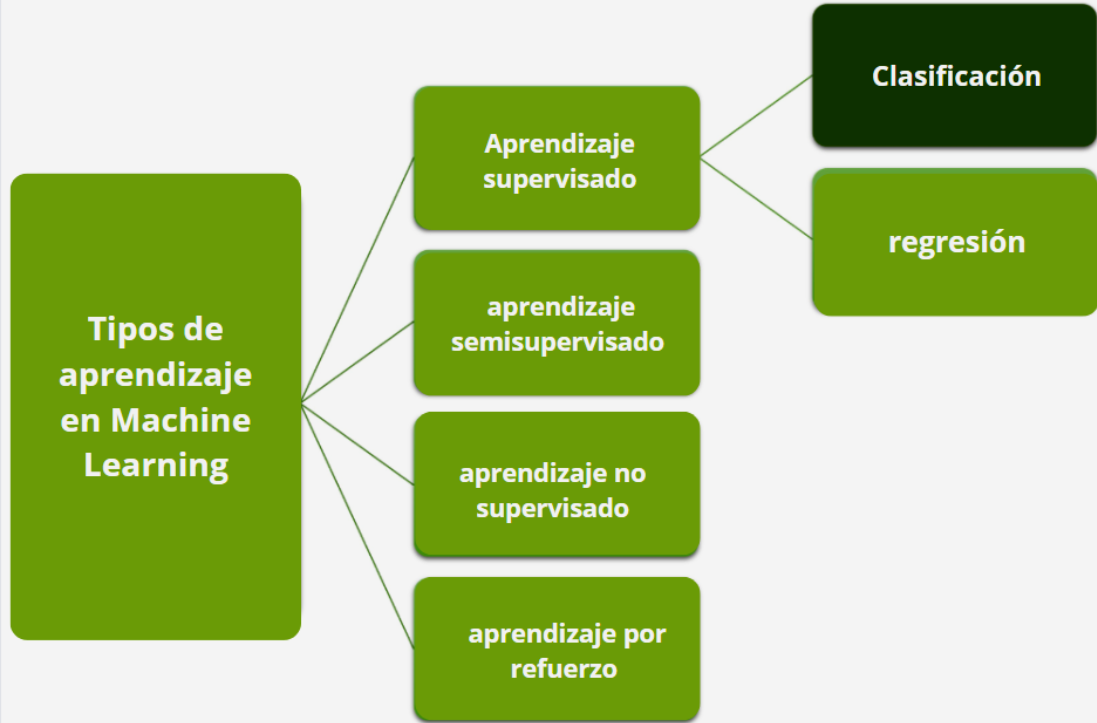

Imagina un grupo de jóvenes que está aprendiendo a identificar diferentes estilos musicales. Tienen un mentor que posee una colección de canciones en su dispositivo de audio, cada una debidamente etiquetada con el género musical correspondiente, pero los jóvenes no pueden distinguir los géneros musicales por sí mismos. Al principio, el mentor comienza a reproducir varias canciones y, al mismo tiempo, dice cuál es el género de cada una de ellas. Ellos escuchan con atención y, a lo largo del tiempo, comienzan a asociar las características musicales, como el ritmo, la instrumentación y los vocales, a los diferentes géneros.

En este ejemplo, los jóvenes se basan en algunas características como ritmos rápidos y vocales enérgicos que encajan en el género pop, mientras que las canciones con guitarras distorsionadas y vocales más intensos se dirigen al género rock. Con base en este proceso, los jóvenes logran identificar el género de nuevas canciones que no fueron previamente etiquetadas por el mentor, pero usando las reglas que aprendieron, fueron capaces de etiquetar y nombrar los nuevos elementos.

El aprendizaje supervisado en Machine Learning sigue este mismo razonamiento. Utiliza conjuntos de datos etiquetados, es decir, bases de datos con registros históricos que contienen la respuesta correcta en cada uno de los registros. Para entonces, a partir de esta respuesta y de las características de los datos, el algoritmo puede trazar una regla para llegar a la respuesta que podrá ser utilizada posteriormente en nuevos datos, con el fin de hacer una predicción.

La característica principal de la clasificación se da por el tipo de dato presente en la respuesta, que debe ser del tipo categórica. Un dato del tipo categórico es aquel que tiene diferentes clases o categorías. Como ejemplos de aplicaciones de clasificación con Machine Learning, tenemos:

Filtrado de correos electrónicos spam
Diagnósticos médicos
Análisis textual de sentimientos
Detección de fraudes bancarios

### Variables numéricas

In [83]:
px.box(datos,x='edad', color = 'adherencia_inversion')

In [84]:
px.box(datos,x='saldo', color = 'adherencia_inversion')

In [85]:
px.box(datos,x='ultimo_contacto', color = 'adherencia_inversion')

In [86]:
px.box(datos,x='ct_contactos', color = 'adherencia_inversion')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [87]:
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

In [88]:
X = datos.drop('adherencia_inversion', axis=1)
y = datos['adherencia_inversion']

In [89]:
X

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos  
0                 587             1  
1                 250             4  
2                  16            18  
3                 700             1  
4                 239             4  
...               ...           ...  
1263             1223             6  
1264              215             1  
1265             1532             2  
1266              525             3  
1267              110             2  

[1268 rows x 8 columns]

In [90]:
y

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

In [91]:
type(y)

pandas.core.series.Series

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

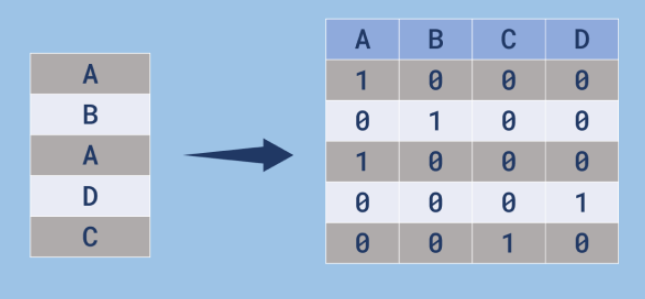

In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [93]:
columnas = X.columns

In [94]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['estado_civil', 'escolaridad', 'default', 'prestatario']),
                                  remainder = 'passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

👉 make_column_transformer = «transforma algunas columnas de cierta forma y deja las demás intactas.»

✅ OneHotEncoder → convierte variables categóricas en columnas binarias.

✅ drop='if_binary' → elimina 1 columna si solo hay 2 clases (para evitar colinealidad).

✅ remainder='passthrough' → no toques las otras columnas.

✅ sparse_threshold=0 → obliga a que el resultado sea una matriz densa (array completo).

✅ force_int_remainder_cols=False → conserva los tipos originales de las columnas restantes.

In [95]:
X = one_hot.fit_transform(X)

In [96]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [97]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [98]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__estado_civil_casado (a)  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      ...   
1263                                     0.0   
1264                                     0.0   
1265                                     0.0   
1266                                     1.0   
1267                                     0.0   

      onehotencoder__estado_civil_divorciado (a)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   
...                                          ...   
1263                                         0.0   
1264                                         0.0   
1265                                         0.0   
1266                                         0.0   
1267                                         0.0   

      onehotencoder__estado_civil_soltero (a)  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
1263                                      1.0   
1264                                      1.0   
1265                                      1.0   
1266                                      0.0   
1267                                      1.0   

      onehotencoder__escolaridad_primaria  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
1263                                  0.0   
1264                                  0.0   
1265                                  0.0   
1266                                  0.0   
1267                                  0.0   

      onehotencoder__escolaridad_secundaria  \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   
...                                     ...   
1263                                    0.0   
1264                                    0.0   
1265                                    0.0   
1266                                    0.0   
1267                                    0.0   

      onehotencoder__escolaridad_superior  onehotencoder__default_si  \
0                                     1.0                        0.0   
1                                     0.0                        0.0   
2                                     1.0                        0.0   
3                                     1.0                        0.0   
4                                     0.0                        0.0   
...                                   ...                        ...   
1263                                  1.0                        0.0   
1264                                  1.0                        0.0   
1265                                  1.0                        0.0   
1266                                  1.0                        0.0   
1267                                  1.0                        0.0   

      onehotencoder__prestatario_si  remainder__edad  remainder__saldo  \
0                               0.0             45.0             242.0   
1                               0.0             42.0            1289.0   
2                     

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [101]:
y

array([1, 1, 0, ..., 1, 1, 1])

Cuando la variable de salida (y) es categórica, y necesitas transformarla en valores numéricos para usarla en modelos como árboles de decisión, regresión logística, redes neuronales, etc.

⚠️ No es ideal usar LabelEncoder para variables categóricas independientes (X), porque el modelo puede interpretar que 0 < 1 < 2 significa algo ordenado, lo cual a veces no es cierto. En esos casos se recomienda OneHotEncoder.

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=5)

###Overfitting y Underfitting

Una tarea muy importante para la evaluación de modelos de machine learning es la división de los datos entre entrenamiento y prueba. El conjunto de entrenamiento se utiliza para que el modelo comprenda patrones y relaciones en los datos para que pueda crear una regla para hacer predicciones. El conjunto de prueba, por su parte, se reserva para evaluar el desempeño del modelo en datos que no se utilizaron en el entrenamiento, simulando la capacidad del modelo de generalizar a nuevos datos.

Existen dos conceptos que están muy ligados a esta división de los datos y que son muy relevantes en los proyectos de machine learning: el overfitting y el underfitting.



**Overfitting (Sobreajuste):**

El overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento. Esto indica que el modelo capturó no solo el patrón de los datos, sino también ruidos y variaciones aleatorias que están presentes en los datos utilizados para el entrenamiento. Como resultado de esto, el modelo tiene un resultado muy bueno al ser evaluado con los datos de entrenamiento, sin embargo, su desempeño en los datos de prueba o en datos nuevos cae considerablemente.

Características del overfitting:

- Error muy bajo en las predicciones en datos de entrenamiento;
- Error muy alto en las predicciones en datos de prueba;
- Modelo muy complejo que intenta memorizar los datos de entrenamiento en lugar de aprender el patrón de los datos.

**Underfitting (Subajuste):**
El underfitting ocurre cuando un modelo es muy simple y no puede capturar el patrón presente en los datos. Esto indica que el modelo no fue capaz de aprender las relaciones existentes en los datos de entrenamiento y termina teniendo un desempeño deficiente tanto en datos de entrenamiento como de prueba.

Características del underfitting:

- Error muy alto en las predicciones en datos de entrenamiento;
- Error muy alto en las predicciones en datos de prueba;
- Modelo muy simple que no puede representar bien los datos.

El objetivo principal de la creación de modelos de machine learning es encontrar un equilibrio entre el overfitting y el underfitting, para que haya un ajuste adecuado. Un modelo bien ajustado es capaz de aprender el patrón de los datos y generalizar a nuevos datos, haciendo predicciones con consistencia sin ser demasiado influenciado por los ruidos presentes en los datos de entrenamiento.

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [104]:
from sklearn.dummy import DummyClassifier

In [105]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.6025236593059937

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [108]:
modelo_arbol.score(X_test, y_test)

0.6656151419558359

In [109]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [110]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [111]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

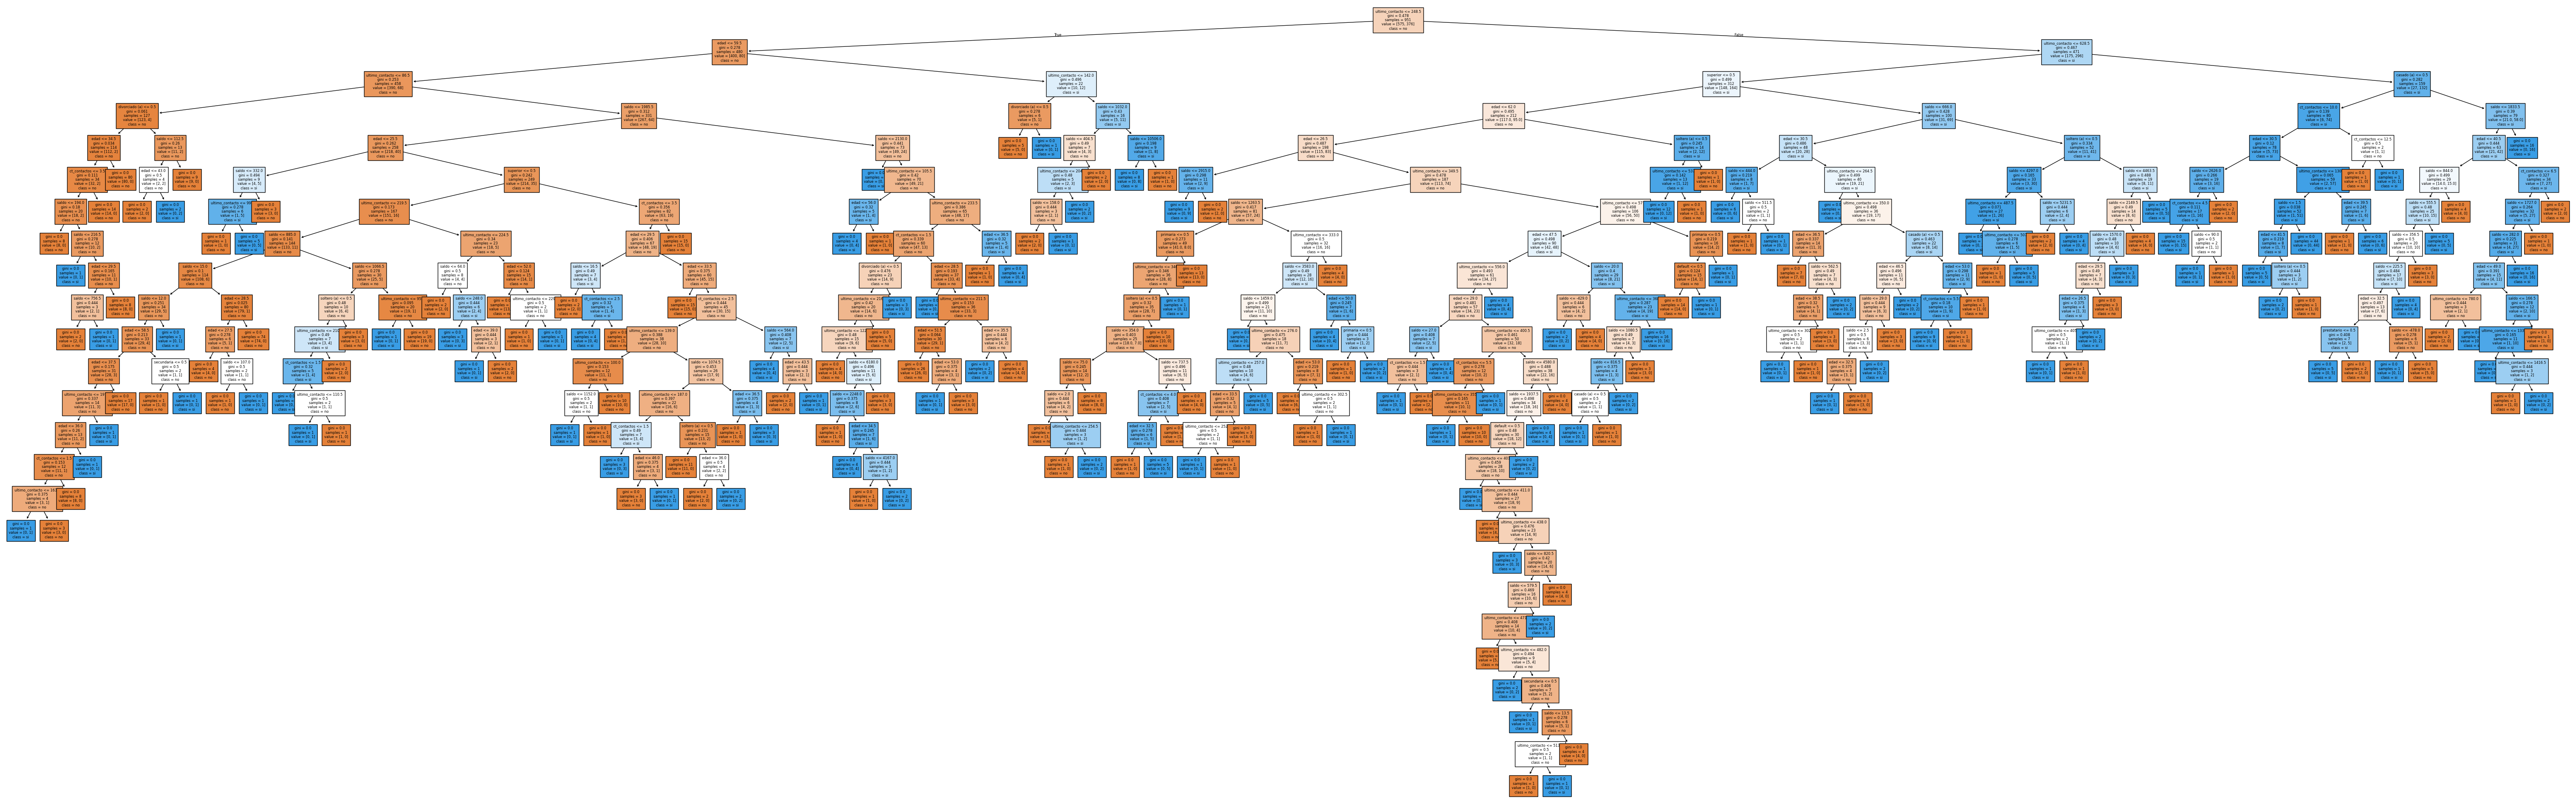

In [112]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=6,
          feature_names=valores_columnas);

In [113]:
modelo_arbol.score(X_train,y_train)

1.0

In [114]:
modelo_arbol= DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [115]:
modelo_arbol.score(X_test,y_test)

0.7160883280757098

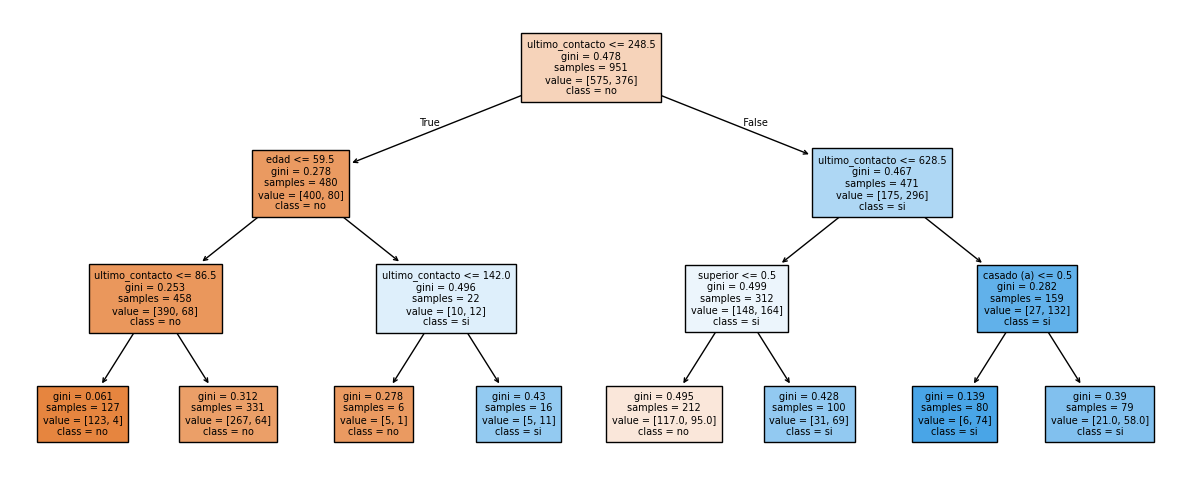

In [116]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=7,
          feature_names=valores_columnas);

In [117]:
modelo_arbol.score(X_train,y_train)

0.7613038906414301

##Cómo funciona el árbol de decisión

El árbol de decisión es un algoritmo de machine learning supervisado que tiene una buena interpretabilidad. Esto significa que es posible tener una comprensión fácil de los pasos que se realizaron para llegar al resultado final de la predicción del modelo. Estos pasos pueden ser representados de forma visual, a partir de un diagrama que indica cada una de las decisiones que se tomaron para llegar a la clasificación de un dato.

Para llegar a una regla que clasifique los datos con una buena tasa de acierto, las decisiones del árbol no pueden ser totalmente aleatorias. Debe haber un sentido en cada elección hecha por el árbol de decisión. Ahora entendamos cómo se hacen estas elecciones:

El primer paso es seleccionar una columna de la base de datos que se utilizará para dividir los datos en 2 subconjuntos. El objetivo es que la mayor cantidad posible de datos se separe en relación con la variable objetivo. Entonces, el mejor resultado posible sería si uno de los subconjuntos tuviera solo datos de una categoría de la variable objetivo y el otro subconjunto tuviera solo datos de la otra categoría restante. Para hacer la mejor elección posible, se prueban diferentes columnas y valores, y aquella que proporcione la mejor separación se elige como la primera regla del árbol de decisión.

Para definir qué es una buena separación, se realizan cálculos matemáticos para obtener la proporción de datos de cada categoría de la variable objetivo dentro de los subconjuntos. El resultado de este cálculo se conoce como métrica de impureza. Existen diferentes tipos de métricas, siendo las más utilizadas la entropía y el índice de Gini.

**Índice Gini**
Este índice informa el grado de heterogeneidad de los datos. Su objetivo es medir la frecuencia de que un elemento aleatorio de un nodo sea etiquetado de manera incorrecta.

**Entropía**
La idea básica de la entropía es medir el desorden de los datos de un nodo mediante la variable clasificadora.  Así como el índice de Gini, se utiliza para caracterizar la impureza de los datos

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)

In [120]:
pd.DataFrame(X_train_normalizada)

0    1    2    3    4    5    6    7         8         9         10  \
0    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.205882  0.065564  0.123734   
1    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.147059  0.045792  0.396527   
2    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.076036  0.335022   
3    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.573529  0.062866  0.315123   
4    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.148380  0.065847   
..   ...  ...  ...  ...  ...  ...  ...  ...       ...       ...       ...   
946  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.191176  0.044265  0.246382   
947  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.205882  0.028043  0.275687   
948  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.323529  0.042952  0.024964   
949  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.176471  0.042810  0.023878   
950  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.294118  0.248802  0.028220   

           11  
0    0.032258  
1    0.032258  
2    0.000000  
3    0.000000  
4    0.129032  
..        ...  
946  0.129032  
947  0.032258  
948  0.129032  
949  0.000000  
950  0.064516  

[951 rows x 12 columns]

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier()

In [123]:
knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier()

In [124]:
X_test_normalizado = normalizacion.transform(X_test)

In [125]:
knn.score(X_test_normalizado, y_test)

0.6876971608832808

###Cómo funciona el KNN

El modelo k-Nearest Neighbors (KNN) es un algoritmo de machine learning ampliamente utilizado. Es una técnica simple, pero eficaz, que se basa en la idea de que los objetos similares tienden a estar cerca unos de otros en un espacio de características. A continuación, exploraremos cómo funciona el KNN y cómo toma decisiones de clasificación.

**Funcionamiento**

El algoritmo KNN opera calculando la distancia entre todos los elementos de la base de datos para determinar la clasificación de un registro, lo cual se realiza al verificar las clases de los elementos que están más cerca.

En esta dinámica, el primer paso consiste en definir un valor de 'k', que es la cantidad de vecinos más cercanos a considerar al momento de hacer la clasificación. La elección de este valor es importante y afecta el rendimiento del modelo. A continuación, se calcula la distancia entre todos los elementos y se almacenan los resultados de estas distancias.

Finalmente, para clasificar cada elemento, se seleccionan los 'k' elementos más cercanos a él y se realiza una votación. La votación consiste en seleccionar la clase que aparece con más frecuencia entre estos vecinos más cercanos.

La normalización de los datos es esencial para este algoritmo, porque se basa en cálculos de distancia. Además, es un algoritmo que demanda mucho computacionalmente cuando hay muchos datos, ya que necesita calcular las distancias entre todos los elementos de entrenamiento.

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [126]:
lista = [('dummy', dummy, X_test),('de árbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy: 0.6025236593059937
La exactitud del modelo de árbol: 0.7160883280757098
La exactitud del modelo knn: 0.6876971608832808


In [127]:
import pickle #exparta archivos binarios

In [128]:
with open('modelo_onehotencoder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [129]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [130]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [131]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

edad estado_civil escolaridad default  saldo prestatario  ultimo_contacto  \
0    45  soltero (a)    superior      no  23040          no              800   

   ct_contactos  
0             4

In [132]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')

modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [133]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)

In [135]:
modelo_arbol.predict(nuevo_dato)

array([1])

###Pickle

Después de crear los modelos de machine learning, comparar los resultados y seleccionar aquel que obtuvo el mejor rendimiento, es el momento de utilizar el modelo para clasificar nuevos datos del mundo real, que es desde el principio el objetivo real del proyecto. Sucede que el modelo generalmente se construye en un notebook y el entorno en el que se va a utilizar el modelo es diferente, en alguna aplicación, sitio o sistema.

\

Para poder utilizar el modelo, es necesario exportarlo, y es en ese momento que entra en escena el pickle. El módulo pickle en Python es una herramienta poderosa y versátil que permite la serialización y deserialización de objetos Python. Este proceso de serialización implica la conversión de objetos Python en una representación binaria que puede ser almacenada en un archivo. Más tarde, esta representación puede ser deserializada para recrear el objeto original.

\

Así, es posible almacenar modelos de machine learning en archivos pickle, para que puedan ser utilizados en otros programas. Él preserva completamente el estado del objeto, incluyendo todos los parámetros y configuraciones. Además, el formato binario generado por el pickle es independiente de la plataforma, lo que significa que es posible crear un archivo en un sistema operativo y cargarlo en otro sin problema de compatibilidad. Vale destacar que en versiones diferentes de Python esto puede ser un problema. Objetos serializados en una versión específica pueden no ser cargados correctamente en otra versión. Por lo tanto, es muy importante saber cuál es la versión del lenguaje y de las bibliotecas utilizadas en el proyecto para que sean replicadas dentro del sistema en el que se va a utilizar.

El proceso para utilizar el pickle involucra principalmente dos funciones:

- **pickle.dump(objeto, archivo):** Esta función permite almacenar un objeto Python en un archivo. El argumento objeto es el objeto que deseas serializar, y el argumento archivo es el objeto de archivo donde deseas almacenar la representación binaria.

- **pickle.load(archivo):** Esta función permite que deserialices (cargues) un objeto Python de un archivo. El argumento archivo es el archivo de donde deseas cargar la representación binaria.

También podemos usar la biblioteca pandas para hacer la lectura de archivos pickle. Para esto, basta con utilizar el método pd.read_pickle.